In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pickle
import seaborn as sns
sns.set_style('whitegrid')
plt.rcParams['text.usetex'] = True

import pandas as pd
from scipy.stats import ttest_ind
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d

import sys
import os
cwd = os.getcwd()
sys.path.insert(1, cwd)
output_path = cwd + '/output/'

## Figure 2A

#### See "Chang_and_Prakash_2024.xlsx" sheet "Acceleration - line plot" for the data

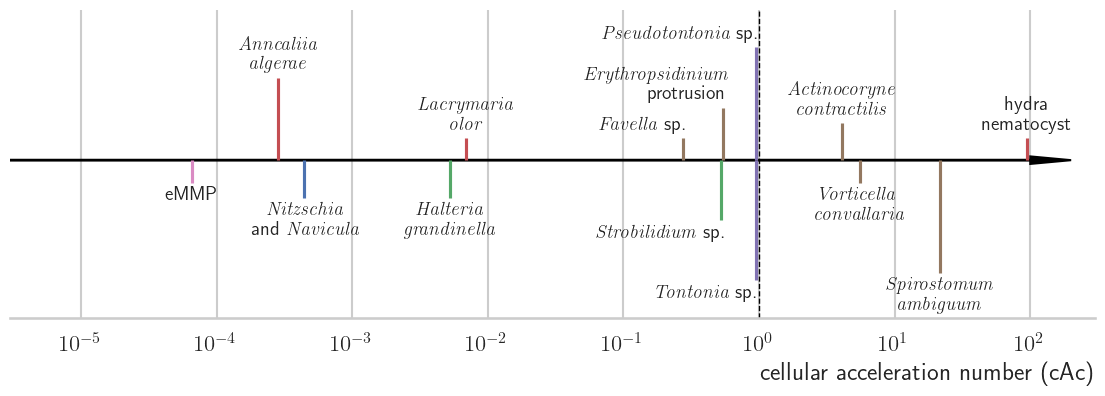

In [16]:
organisms = ['$\it{Spirostomum}$'+'\n'+'$\it{ambiguum}$', 
             '$\it{Vorticella}$'+'\n'+'$\it{convallaria}$',
             'eMMP', 
             'hydra\n nematocyst',
             '$\it{Halteria}$'+'\n'+'$\it{grandinella}$',
             '$\it{Nitzschia}$'+ '\n and $\it{Navicula}$',
             '$\it{Anncaliia}$'+'\n'+'$\it{algerae}$',
             '$\it{Pseudotontonia}$ sp.',
             '$\it{Strobilidium}$ sp.',
             '$\it{Tontonia}$ sp.',
             '$\it{Erythropsidinium}$\n protrusion',
             '$\it{Lacrymaria}$'+'\n'+'$\it{olor}$',
             '$\it{Actinocoryne}$'+'\n'+'$\it{contractilis}$',
             '$\it{Favella}$ sp.',
            ]
acceleration = [150, 40, 8.76E-05, 54100000, 6.96E-02, 0.5, 6.13E-02, 3.17E+01, 1.27E+01, 8.33E+01, 6, 1.50E-02, 1.00E+02, 7.00E-01]
accel_BL = [1.50E+05, 1.60E+05, 8.76E+00, 3.61E+12, 3.48E+03, 2.50E+05, 2.04E+04, 3.81E+05, 1.66E+05, 1.38E+06, 6.00E+04, 3.75E+02, 6.67E+05, 5.38E+03]
cAcc = [21.51657415, 5.555555556, 0.0000657717715, 94.95613022, 0.005243691095, 0.0004444444444, 0.0002858531091, 
        0.9454221733, 0.5280127102, 0.954227199, 0.544331054, 0.006885303727, 4.082482905, 0.275582436]

sns.set_context("talk")
sns.set_style('whitegrid')
plt.rcParams['text.usetex'] = True
plt.figure(figsize=(14,4))
plt.arrow(3E-6, 0, 1E2, 0, color = 'black', width = .1, head_width = 1, head_length = 1E2)
plt.xscale('log')
plt.xticks(ticks=[1E-5, 1E-4, 1E-3, 1E-2, 1E-1, 1E0, 1E1, 1E2])
ax = plt.gca()
ax.yaxis.set_visible(False)
ax.spines[["left", "top", "right"]].set_visible(False)

ax.vlines(1,-21,20, color = 'black', linewidth = 1, linestyle = 'dashed')
levels = [-15,#spiro 
          -3, #vorticella
          -3, #eMMP
          3, #nematocyst
          -5, #Halteria
          -5, #diatom
          11, #microsporidia
          15, #pseudotontonia
          -8, #strobilidium
          -16, #tontonia
          7, #Erythropsidinium
          3, #lacry
          5, #actinocoryne
          3, #Favella
         ]
alignment = [0,#spiro
            0, #vorticella
            0, #eMMP
            0,#nematocyst
            0,#Halteria
            0,#diatom
            0,#microsporidia
             1,#pseudotontonia
             1,#strobilidium
             1,#tontonia
             1,#Erythropsidinium
             0,#lacry
             0, #actinocoryne
             1, #Favella
            ]
colors = ['C5',#spiro
          'C5', #vorticella
            'C6', #eMMP
            'C3',#nematocyst
            'C2',#Halteria
            'C0',#diatom
            'C3',#microsporidia
             'C4',#pseudotontonia
             'C2',#strobilidium
             'C4',#tontonia
             'C5',#Erythropsidinium
             'C3',#lacry
             'C5',#actinocoryne
             'C5', #Favella
         ]
ax.vlines(cAcc, 0, levels, color=colors)
for d, l, r, a in zip(cAcc, levels, organisms, alignment):
    ax.annotate(r, xy=(d, l),
                xytext=(3*np.sign(a), np.sign(l)*3), textcoords="offset points",
                horizontalalignment="center" if a == 0 else "left" if a == -1 else "right",
                verticalalignment="bottom" if l > 0 else "top", 
                fontsize = 14)

plt.xlabel('cellular acceleration number (cAc)', loc = 'right')
plt.ylim([-21,20])
plt.xlim([3E-6,3E2])
plt.savefig(output_path+'Fig_2A.png', bbox_inches='tight', dpi = 400)

### Figure S1A

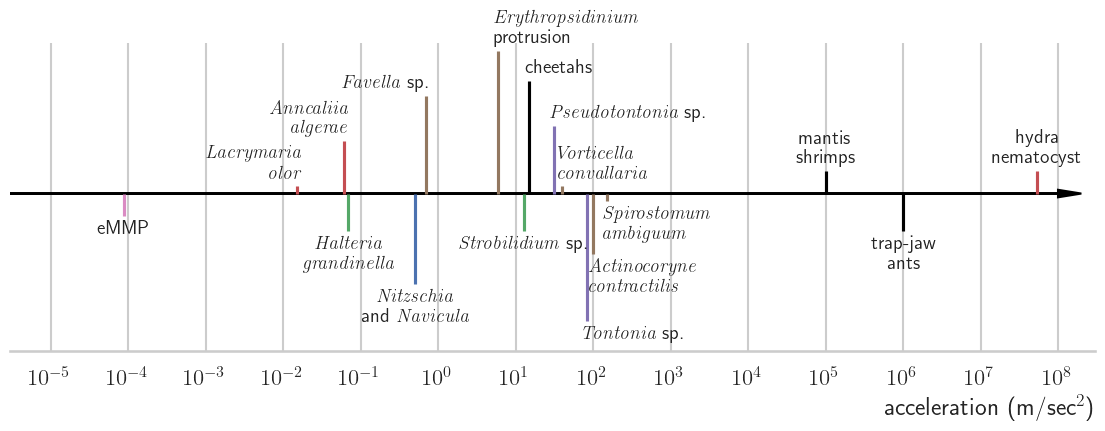

In [7]:
organisms = ['$\it{Spirostomum}$'+'\n'+'$\it{ambiguum}$', 
             '$\it{Vorticella}$'+'\n'+'$\it{convallaria}$',
             'eMMP', 
             'hydra\n nematocyst',
             '$\it{Halteria}$'+'\n'+'$\it{grandinella}$',
             '$\it{Nitzschia}$'+ '\n and $\it{Navicula}$',
             '$\it{Anncaliia}$'+'\n'+'$\it{algerae}$',
             '$\it{Pseudotontonia}$ sp.',
             '$\it{Strobilidium}$ sp.',
             '$\it{Tontonia}$ sp.',
             '$\it{Erythropsidinium}$\n protrusion',
             '$\it{Lacrymaria}$'+'\n'+'$\it{olor}$',
             '$\it{Actinocoryne}$'+'\n'+'$\it{contractilis}$',
            '$\it{Favella}$ sp.',
            ]
acceleration = [150, 40, 8.76E-05, 54100000, 6.96E-02, 
                0.5, 6.13E-02, 3.17E+01, 1.27E+01, 8.33E+01, 6, 1.50E-02, 1.00E+02, 7.00E-01]
accel_BL = [1.50E+05, 1.60E+05, 8.76E+00, 3.61E+12, 3.48E+03, 2.50E+05, 2.04E+04, 3.81E+05, 1.66E+05, 1.38E+06, 6.00E+04, 3.75E+02, 6.67E+05, 5.38E+03]
cAcc = [21.51657415, 5.555555556, 0.0000657717715, 94.95613022, 0.005243691095, 0.0004444444444, 0.0002858531091, 
        0.9454221733, 0.5280127102, 0.954227199, 0.544331054, 0.006885303727, 4.082482905, 0.275582436]

sns.set_context("talk")
plt.figure(figsize=(14,4))
plt.arrow(3E-6, 0, 1E8, 0, color = 'black', width = .1, head_width = 1, head_length = 1E8)
plt.xscale('log')
plt.xticks(ticks=[1E-5, 1E-4, 1E-3, 1E-2, 1E-1, 1E0, 1E1, 1E2, 1E3, 1E4, 1E5, 1E6, 1E7, 1E8])
ax = plt.gca()
ax.yaxis.set_visible(False)
ax.spines[["left", "top", "right"]].set_visible(False)

levels = [-1,#spiro 
          1, #vorticella
          -3, #eMMP
          3, #nematocyst
          -5, #Halteria
          -12, #diatom
          7, #microsporidia
          9, #pseudotontonia
          -5, #strobilidium
          -17, #tontonia
          19, #Erythropsidinium
          1, #lacry
          -8, #actinocoryne
          13 # Favella
         ]
alignment = [-1,#spiro
            -1, #vorticella
            0, #eMMP
            0,#nematocyst
            0,#Halteria
            0,#diatom
            1,#microsporidia
             -1,#pseudotontonia
             0,#strobilidium
             -1,#tontonia
             -1,#Erythropsidinium
             1,#lacry
             -1, #actinocoryne
             1, #Favella
            ]
colors = ['C5',#spiro
          'C5', #vorticella
            'C6', #eMMP
            'C3',#nematocyst
            'C2',#Halteria
            'C0',#diatom
            'C3',#microsporidia
             'C4',#pseudotontonia
             'C2',#strobilidium
             'C4',#tontonia
             'C5',#Erythropsidinium
             'C3',#lacry
             'C5', #actinocoryne
          'C5', #Favella
         ]

acc_multi = [15, 1E5, 1E6]
organisms_multi = ['cheetahs', 'mantis\nshrimps', 'trap-jaw\nants']
levels_multi = [15, 3, -5]
alignment_multi = [-1, 0, 0]

ax.vlines(acceleration, 0, levels, color=colors)
for d, l, r, a in zip(acceleration, levels, organisms, alignment):
    ax.annotate(r, xy=(d, l),
                xytext=(3*np.sign(a), np.sign(l)*3), textcoords="offset points",
                horizontalalignment="center" if a == 0 else "left" if a == -1 else "right",
                verticalalignment="bottom" if l > 0 else "top", 
                fontsize = 14)

ax.vlines(acc_multi, 0, levels_multi, color='black')
for d, l, r, a in zip(acc_multi, levels_multi, organisms_multi, alignment_multi):
    ax.annotate(r, xy=(d, l),
                xytext=(3*np.sign(a), np.sign(l)*3), textcoords="offset points",
                horizontalalignment="center" if a == 0 else "left" if a == -1 else "right",
                verticalalignment="bottom" if l > 0 else "top", 
                fontsize = 14)

plt.xlabel(r'acceleration (m/sec$^2$)', loc = 'right')
plt.ylim([-21,20])
plt.xlim([3E-6,3E8])
plt.savefig(output_path+'Fig_S1A.png', bbox_inches='tight', dpi = 400)

### Figure S1B

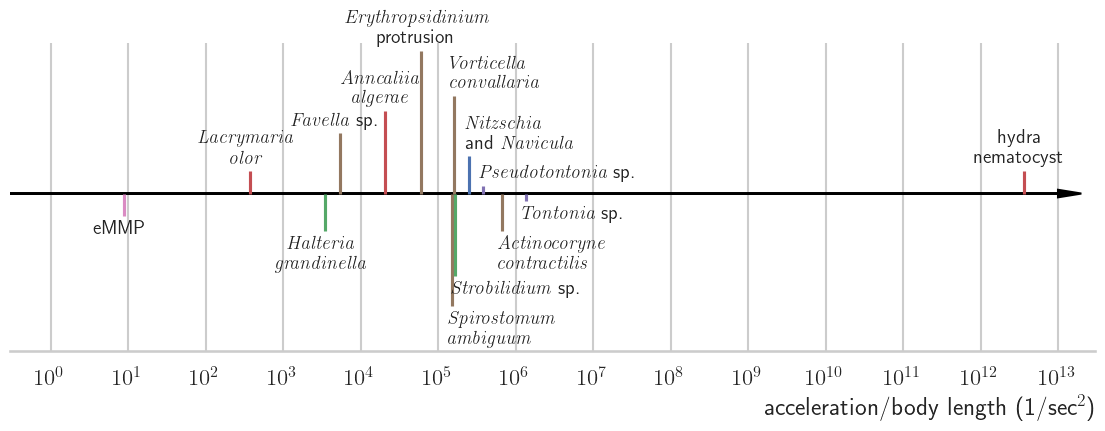

In [8]:
organisms = ['$\it{Spirostomum}$'+'\n'+'$\it{ambiguum}$', 
             '$\it{Vorticella}$'+'\n'+'$\it{convallaria}$',
             'eMMP', 
             'hydra\n nematocyst',
             '$\it{Halteria}$'+'\n'+'$\it{grandinella}$',
             '$\it{Nitzschia}$'+ '\n and $\it{Navicula}$',
             '$\it{Anncaliia}$'+'\n'+'$\it{algerae}$',
             '$\it{Pseudotontonia}$ sp.',
             '$\it{Strobilidium}$ sp.',
             '$\it{Tontonia}$ sp.',
             '$\it{Erythropsidinium}$\n protrusion',
             '$\it{Lacrymaria}$'+'\n'+'$\it{olor}$',
             '$\it{Actinocoryne}$'+'\n'+'$\it{contractilis}$',
             '$\it{Favella}$ sp.',
            ]
acceleration = [150, 40, 8.76E-05, 54100000, 6.96E-02, 0.5, 6.13E-02, 3.17E+01, 1.27E+01, 8.33E+01, 6, 1.50E-02, 1.00E+02, 7.00E-01]
accel_BL = [1.50E+05, 1.60E+05, 8.76E+00, 3.61E+12, 3.48E+03, 2.50E+05, 2.04E+04, 3.81E+05, 1.66E+05, 1.38E+06, 6.00E+04, 3.75E+02, 6.67E+05, 5.38E+03]
cAcc = [21.51657415, 5.555555556, 0.0000657717715, 94.95613022, 0.005243691095, 0.0004444444444, 0.0002858531091, 
        0.9454221733, 0.5280127102, 0.954227199, 0.544331054, 0.006885303727, 4.082482905, 0.275582436]

sns.set_context("talk")
plt.figure(figsize=(14,4))
plt.arrow(0.1, 0, 1E13, 0, color = 'black', width = .1, head_width = 1, head_length = 1E13)
plt.xscale('log')
plt.xticks(ticks=10**np.arange(0,14,1))
ax = plt.gca()
ax.yaxis.set_visible(False)
ax.spines[["left", "top", "right"]].set_visible(False)

levels = [-15,#spiro 
          13, #vorticella
          -3, #eMMP
          3, #nematocyst
          -5, #Halteria
          5, #diatom
          11, #microsporidia
          1, #pseudotontonia
          -11, #strobilidium
          -1, #tontonia
          19, #Erythropsidinium
          3, #lacry
          -5,#actinocoryne
          8, #Favella
         ]
alignment = [-1,#spiro
            -1, #vorticella
            0, #eMMP
            0,#nematocyst
            0,#Halteria
            -1,#diatom
            0,#microsporidia
             -1,#pseudotontonia
             -1,#strobilidium
             -1,#tontonia
             0,#Erythropsidinium
             0,#lacry
             -1, #actinocoryne
             0, #Favella
            ]
colors = ['C5',#spiro
          'C5', #vorticella
            'C6', #eMMP
            'C3',#nematocyst
            'C2',#Halteria
            'C0',#diatom
            'C3',#microsporidia
             'C4',#pseudotontonia
             'C2',#strobilidium
             'C4',#tontonia
             'C5',#Erythropsidinium
             'C3',#lacry
             'C5', #actinocoryne
          'C5', #Favella
         ]
ax.vlines(accel_BL, 0, levels, color=colors)
for d, l, r, a in zip(accel_BL, levels, organisms, alignment):
    ax.annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="center" if a == 0 else "left" if a == -1 else "right",
                verticalalignment="bottom" if l > 0 else "top", 
                fontsize = 14)

plt.xlabel(r'acceleration/body length (1/sec$^2$)', loc = 'right')
plt.ylim([-21,20])
plt.xlim([3E-1, 3E13])
plt.savefig(output_path+'Fig_S1B.png', bbox_inches='tight', dpi = 400)

## Figure 2B

#### See "Chang_and_Prakash_2024.xlsx" sheet "Speed - line plot" for the data

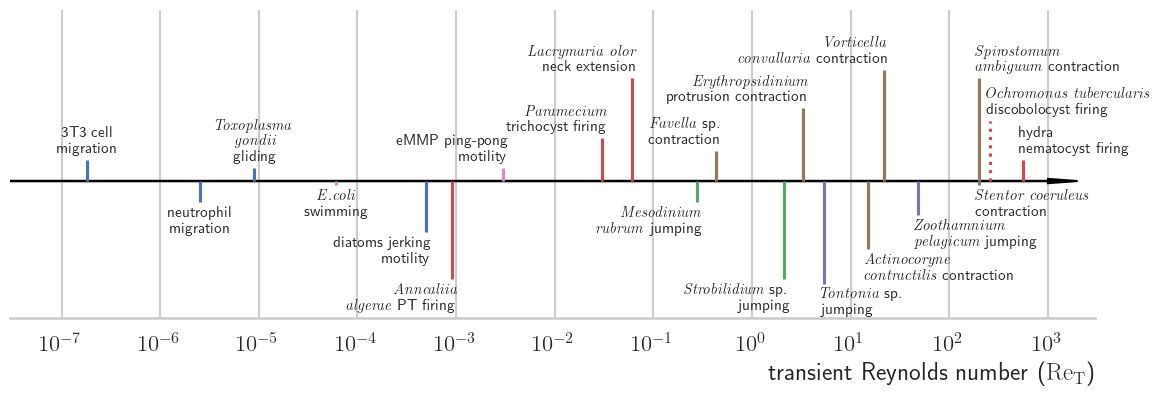

In [9]:
organisms = ['3T3 cell\nmigration', 
             'neutrophil\nmigration',
             '$\it{Toxoplasma}$'+'\n'+'$\it{gondii}$\ngliding', 
             '$\it{E. coli}$\nswimming',
             'eMMP ping-pong\nmotility',
             'diatoms jerking\nmotility',
             '$\it{Lacrymaria}$'+' '+'$\it{olor}$\nneck extension',
             '$\it{Mesodinium}$'+ '\n$\it{rubrum}$ jumping',
             '$\it{Strobilidium}$ sp.\njumping',
             '$\it{Anncaliia}$'+'\n'+'$\it{algerae}$ PT firing',
             '$\it{Tontonia}$ sp.\njumping',
             '$\it{Zoothamnium}$'+'\n'+'$\it{pelagicum}$ jumping',
             '$\it{Paramecium}$'+'\n'+'trichocyst firing', 
             '$\it{Spirostomum}$'+'\n'+'$\it{ambiguum}$ contraction',
             '$\it{Vorticella}$'+'\n'+'$\it{convallaria}$ contraction',
             '$\it{Stentor}$'+' '+'$\it{coeruleus}$\ncontraction',
             '$\it{Erythropsidinium}$\n protrusion contraction',
             '$\it{Actinocoryne}$'+'\n'+'$\it{contractilis}$ contraction',
             'hydra\nnematocyst firing',
             '$\it{Ochromonas}$ $\it{tubercularis}$'+'\n'+'discobolocyst firing',
             '$\it{Favella}$ sp.\ncontraction',
            ]
velocity = [1.00E-08, 3.00E-07, 1.50E-06, 3.00E-05, 3.00E-04,
            2.50E-04, 1.50E-03, 7.35E-03,
            2.76E-02, 3.00E-04, 8.82E-02, 1.10E-01, 1.00E-02,
            0.2, 8.80E-02, 0.2, 3.30E-02, 1.00E-01, 37.1, 260, 3.30E-03]
velocity_BL = [5.56E-04, 3.57E-02, 2.50E-01, 1.50E+01, 3.00E+01,
               1.25E+02, 3.75E+01, 1.93E+02,
               3.61E+02, 1.00E+02, 1.46E+03, 2.50E+02, 3.33E+03,
               2.00E+02, 3.52E+02, 2.00E+02, 3.30E+02, 6.67E+02, 2.47E+06, 2.60E+08, 2.54E+01]
Re_T = [1.80E-07, 2.52E-06, 9.00E-06, 6.00E-05, 3.00E-03, 5.00E-04,
       6.00E-02, 2.79E-01, 2.11E+00, 9.00E-04, 5.34E+00, 4.84E+01,3.00E-02, 
       2.00E+02, 2.20E+01, 2.00E+02, 3.30E+00, 1.50E+01, 5.57E+02, 2.60E+02, 4.29E-01]

sns.set_context("talk")
plt.figure(figsize=(14,4))
plt.arrow(3E-8, 0, 1E3, 0, color = 'black', width = .1, head_width = 1, head_length = 1E3)
plt.xscale('log')
plt.xticks(ticks=[1E-7, 1E-6, 1E-5, 1E-4, 1E-3, 1E-2, 1E-1, 1E0, 1E1, 1E2, 1E3])
ax = plt.gca()
ax.yaxis.set_visible(False)
ax.spines[["left", "top", "right"]].set_visible(False)

levels = [5, #3T3 
          -5, #neutrophil
          3, #toxo
          -1, #Ecoli
          3, #MMP
          -12, #diatom
          24, #lacry
          -5, #mesodinium
          -23, #strobilidium
          -23, #microsporidia
          -24, #tontonia
          -8, #Z pelagicum
           10, #trichocyst
          24, #spiro
          26, #vorticella
          -1, #stentor
          17, #erythropsidinium
          -16, #actinocoryne
          5, #nematocyst
          14, #discobolocyst
          7] #Favella
alignment = [0, #3T3 
          0, #neutrophil
          0, #toxo
          0, #Ecoli
          1, #MMP
          1, #diatom
          1, #lacry
          1, #mesodinium
          1, #strobilidium
          1, #microsporidia
          -1, #tontonia
          -1, #Z pelagicum
          1, #trichocyst
          -1, #spiro
          1, #vorticella
          -1, #stentor
          1, #erythropsidinium
          -1, #actinocoryne
          -1, #nematocyst
          -1,#discobolocyst
            1] #Favella
colors =  ['C0', #3T3 
          'C0', #neutrophil
          'C0', #toxo
          'C6', #Ecoli
          'C6', #MMP
          'C0', #diatom
          'C3', #lacry
          'C2', #mesodinium
          'C2', #strobilidium
          'C3', #microsporidia
          'C4', #tontonia
          'C4', #Z pelagicum
          'C3', #trichocyst
          'C5', #spiro
          'C5', #vorticella
          'C5', #stentor
          'C5', #erythropsidinium
          'C5', #actinocoryne
          'C3', #nematocyst
          'C3', #discobolocyst
           'C5', #Favella
          ]
styles = ['solid', #3T3 
          'solid', #neutrophil
          'solid', #toxo
          'solid', #Ecoli
          'solid', #MMP
          'solid', #diatom
          'solid', #lacry
          'solid', #mesodinium
          'solid', #strobilidium
          'solid', #microsporidia
          'solid', #tontonia
          'solid', #Z pelagicum
          'solid', #trichocyst
          'solid', #spiro
          'solid', #vorticella
          'solid', #stentor
          'solid', #erythropsidinium
          'solid', #actinocoryne
          'solid', #nematocyst
          'dotted',#discobolocyst
          'solid', #Favella
         ]

ax.vlines(Re_T, 0, levels, color=colors, linestyle = styles)
for d, l, r, a in zip(Re_T, levels, organisms, alignment):
    ax.annotate(r, xy=(d, l),
                xytext=(3*np.sign(a), np.sign(l)*3), textcoords="offset points",
                horizontalalignment="center" if a == 0 else "left" if a == -1 else "right",
                verticalalignment="bottom" if l > 0 else "top", 
                fontsize = 11)

plt.xlabel(r'transient Reynolds number ($\mathrm{Re}_{\mathrm{T}}$)', loc = 'right')
plt.ylim([-32,40])
plt.xlim([3E-8,3E3])
plt.savefig(output_path+'Fig_2B.png', bbox_inches='tight', dpi = 400)

### Figure S2A

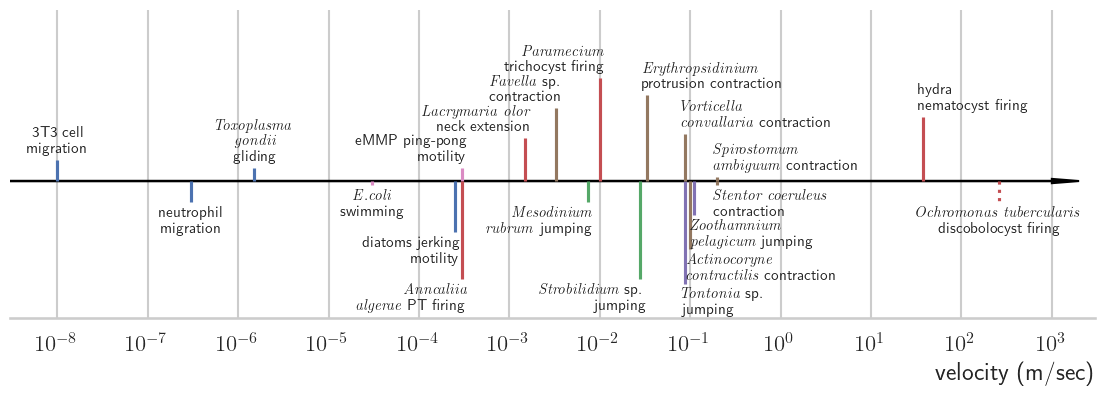

In [10]:
organisms = ['3T3 cell\nmigration', 
             'neutrophil\nmigration',
             '$\it{Toxoplasma}$'+'\n'+'$\it{gondii}$\ngliding', 
             '$\it{E. coli}$\nswimming',
             'eMMP ping-pong\nmotility',
             'diatoms jerking\nmotility',
             '$\it{Lacrymaria}$'+' '+'$\it{olor}$\nneck extension',
             '$\it{Mesodinium}$'+ '\n$\it{rubrum}$ jumping',
             '$\it{Strobilidium}$ sp.\njumping',
             '$\it{Anncaliia}$'+'\n'+'$\it{algerae}$ PT firing',
             '$\it{Tontonia}$ sp.\njumping',
             '$\it{Zoothamnium}$'+'\n'+'$\it{pelagicum}$ jumping',
             '$\it{Paramecium}$'+'\n'+'trichocyst firing', 
             '$\it{Spirostomum}$'+'\n'+'$\it{ambiguum}$ contraction',
             '$\it{Vorticella}$'+'\n'+'$\it{convallaria}$ contraction',
             '$\it{Stentor}$'+' '+'$\it{coeruleus}$\ncontraction',
             '$\it{Erythropsidinium}$\n protrusion contraction',
             '$\it{Actinocoryne}$'+'\n'+'$\it{contractilis}$ contraction',
             'hydra\nnematocyst firing',
             '$\it{Ochromonas}$ $\it{tubercularis}$'+'\n'+'discobolocyst firing',
             '$\it{Favella}$ sp.\ncontraction',
            ]
velocity = [1.00E-08, 3.00E-07, 1.50E-06, 3.00E-05, 3.00E-04,
            2.50E-04, 1.50E-03, 7.35E-03,
            2.76E-02, 3.00E-04, 8.82E-02, 1.10E-01, 1.00E-02,
            0.2, 8.80E-02, 0.2, 3.30E-02, 1.00E-01, 37.1, 260, 3.30E-03]
velocity_BL = [5.56E-04, 3.57E-02, 2.50E-01, 1.50E+01, 3.00E+01,
               1.25E+02, 3.75E+01, 1.93E+02,
               3.61E+02, 1.00E+02, 1.46E+03, 2.50E+02, 3.33E+03,
               2.00E+02, 3.52E+02, 2.00E+02, 3.30E+02, 6.67E+02, 2.47E+06, 2.60E+08, 2.54E+01]

sns.set_context("talk")
plt.figure(figsize=(14,4))
plt.arrow(3E-9, 0, 1E3, 0, color = 'black', width = .1, head_width = 1, head_length = 1E3)
plt.xscale('log')
plt.xticks(ticks=[1E-8, 1E-7, 1E-6, 1E-5, 1E-4, 1E-3, 1E-2, 1E-1, 1E0, 1E1, 1E2, 1E3])
ax = plt.gca()
ax.yaxis.set_visible(False)
ax.spines[["left", "top", "right"]].set_visible(False)

levels = [5, #3T3 
          -5, #neutrophil
          3, #toxo
          -1, #Ecoli
          3, #MMP
          -12, #diatom
          10, #lacry
          -5, #mesodinium
          -23, #strobilidium
          -23, #microsporidia
          -24, #tontonia
          -8, #Z pelagicum
           24, #trichocyst
          1, #spiro
          11, #vorticella
          -1, #stentor
          20, #erythropsidinium
          -16, #actinocoryne
          15, #nematocyst
          -5, #discobolocyst
          17] #Favella
alignment = [0, #3T3 
          0, #neutrophil
          0, #toxo
          0, #Ecoli
          1, #MMP
          1, #diatom
          1, #lacry
          1, #mesodinium
          1, #strobilidium
          1, #microsporidia
          -1, #tontonia
          -1, #Z pelagicum
          1, #trichocyst
          -1, #spiro
          -1, #vorticella
          -1, #stentor
          -1, #erythropsidinium
          -1, #actinocoryne
          -1, #nematocyst
          0,#discobolocyst
            1] #Favella
colors =  ['C0', #3T3 
          'C0', #neutrophil
          'C0', #toxo
          'C6', #Ecoli
          'C6', #MMP
          'C0', #diatom
          'C3', #lacry
          'C2', #mesodinium
          'C2', #strobilidium
          'C3', #microsporidia
          'C4', #tontonia
          'C4', #Z pelagicum
          'C3', #trichocyst
          'C5', #spiro
          'C5', #vorticella
          'C5', #stentor
          'C5', #erythropsidinium
          'C5', #actinocoryne
          'C3', #nematocyst
          'C3', #discobolocyst
           'C5', #Favella
          ]
styles = ['solid', #3T3 
          'solid', #neutrophil
          'solid', #toxo
          'solid', #Ecoli
          'solid', #MMP
          'solid', #diatom
          'solid', #lacry
          'solid', #mesodinium
          'solid', #strobilidium
          'solid', #microsporidia
          'solid', #tontonia
          'solid', #Z pelagicum
          'solid', #trichocyst
          'solid', #spiro
          'solid', #vorticella
          'solid', #stentor
          'solid', #erythropsidinium
          'solid', #actinocoryne
          'solid', #nematocyst
          'dotted',#discobolocyst
          'solid', #Favella
         ]

ax.vlines(velocity, 0, levels, color=colors, linestyle = styles)
for d, l, r, a in zip(velocity, levels, organisms, alignment):
    ax.annotate(r, xy=(d, l),
                xytext=(3*np.sign(a), np.sign(l)*3), textcoords="offset points",
                horizontalalignment="center" if a == 0 else "left" if a == -1 else "right",
                verticalalignment="bottom" if l > 0 else "top", 
                fontsize = 11)

plt.xlabel(r'velocity (m/sec)', loc = 'right')
plt.ylim([-32,40])
plt.xlim([3E-9,3E3])
plt.savefig(output_path+'Fig_S2A.png', bbox_inches='tight', dpi = 400)

### Figure S2B

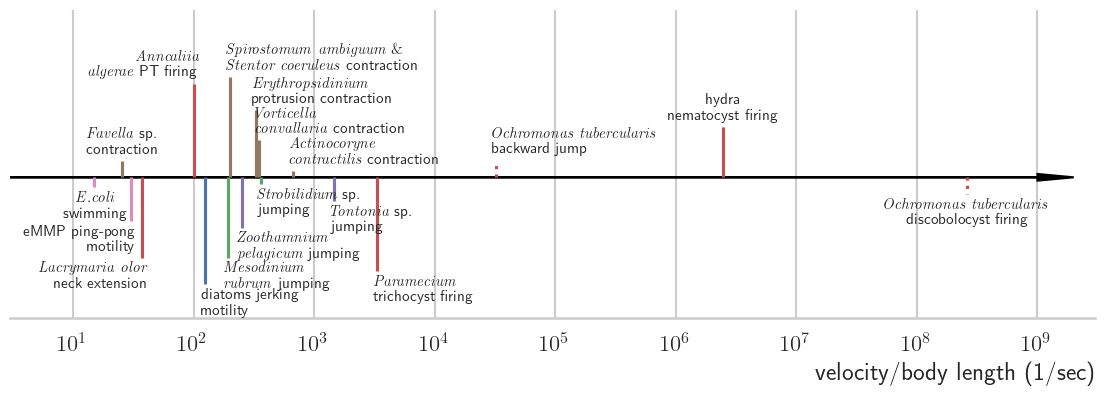

In [11]:
organisms = ['$\it{E. coli}$\nswimming',
             'eMMP ping-pong\nmotility',
             'diatoms jerking\nmotility',
             '$\it{Lacrymaria}$'+' '+'$\it{olor}$\nneck extension',
             '$\it{Mesodinium}$'+ '\n$\it{rubrum}$ jumping',
             '$\it{Strobilidium}$ sp.\njumping',
             '$\it{Anncaliia}$'+'\n'+'$\it{algerae}$ PT firing',
             '$\it{Tontonia}$ sp.\njumping',
             '$\it{Zoothamnium}$'+'\n'+'$\it{pelagicum}$ jumping',
             '$\it{Paramecium}$'+'\n'+'trichocyst firing', 
             '$\it{Spirostomum}$ $\it{ambiguum}$ $\&$'+'\n'+'$\it{Stentor}$ $\it{coeruleus}$ contraction',
             '$\it{Vorticella}$'+'\n'+'$\it{convallaria}$ contraction',
             '$\it{Erythropsidinium}$\n protrusion contraction',
             '$\it{Actinocoryne}$'+'\n'+'$\it{contractilis}$ contraction',
             'hydra\nnematocyst firing',
             '$\it{Ochromonas}$ $\it{tubercularis}$'+'\n'+'discobolocyst firing',
             '$\it{Favella}$ sp.\ncontraction',
             '$\it{Ochromonas}$ $\it{tubercularis}$'+'\n'+'backward jump',
            ]
velocity = [3.00E-05, 3.00E-04,
            2.50E-04, 1.50E-03, 7.35E-03,
            2.76E-02, 3.00E-04, 8.82E-02, 1.10E-01, 1.00E-02,
            0.2, 8.80E-02, 3.30E-02, 1.00E-01, 37.1, 260, 3.30E-03, 0.45]
velocity_BL = [1.50E+01, 3.00E+01,
               1.25E+02, 3.75E+01, 1.93E+02,
               3.61E+02, 1.00E+02, 1.46E+03, 2.50E+02, 3.33E+03,
               2.00E+02, 3.52E+02, 3.30E+02, 6.67E+02, 2.47E+06, 2.60E+08, 2.54E+01, 3.21E+04]

sns.set_context("talk")
plt.figure(figsize=(14,4))
plt.arrow(3E0, 0, 1E9, 0, color = 'black', width = .1, head_width = 2, head_length = 1E9)
plt.xscale('log')
plt.xticks(ticks=[1E1, 1E2, 1E3, 1E4, 1E5, 1E6, 1E7, 1E8, 1E9])
ax = plt.gca()
ax.yaxis.set_visible(False)
ax.spines[["left", "top", "right"]].set_visible(False)

levels = [-3, #Ecoli
          -13, #MMP
          -32, #diatom
          -24, #lacry
          -24, #mesodinium
          -2, #strobilidium
          28, #microsporidia
          -7, #tontonia
          -15, #Z pelagicum
           -28, #trichocyst
          30, #spiro
          11, #vorticella
          20, #erythropsidinium
          2, #actinocoryne
          15, #nematocyst
          -5, #discobolocyst
          5, #Favella
          5, #Ochromonas
         ]
alignment = [0, #Ecoli
          1, #MMP
          -1, #diatom
          1, #lacry
          -1, #mesodinium
          -1, #strobilidium
          1, #microsporidia
          -1, #tontonia
          -1, #Z pelagicum
          -1, #trichocyst
          -1, #spiro
          -1, #vorticella
          -1, #erythropsidinium
          -1, #actinocoryne
          0, #nematocyst
          0, #discobolocyst
            0, #Favella
            -1, #Ochromonas
            ]
colors =  ['C6', #Ecoli
          'C6', #MMP
          'C0', #diatom
          'C3', #lacry
          'C2', #mesodinium
          'C2', #strobilidium
          'C3', #microsporidia
          'C4', #tontonia
          'C4', #Z pelagicum
          'C3', #trichocyst
          'C5', #spiro
          'C5', #vorticella
          'C5', #erythropsidinium
          'C5', #actinocoryne
          'C3', #nematocyst
          'C3', #discobolocyst
           'C5', #Favella
           'C3', #Ochromonas
          ]
styles = ['solid', #Ecoli
          'solid', #MMP
          'solid', #diatom
          'solid', #lacry
          'solid', #mesodinium
          'solid', #strobilidium
          'solid', #microsporidia
          'solid', #tontonia
          'solid', #Z pelagicum
          'solid', #trichocyst
          'solid', #spiro
          'solid', #vorticella
          'solid', #erythropsidinium
          'solid', #actinocoryne
          'solid', #nematocyst
          'dotted',#discobolocyst
          'solid', #Favella
           'dotted',#Ochromonas
         ]

ax.vlines(velocity_BL, 0, levels, color=colors, linestyle = styles)
for d, l, r, a in zip(velocity_BL, levels, organisms, alignment):
    ax.annotate(r, xy=(d, l),
                xytext=(3*np.sign(a), np.sign(l)*3), textcoords="offset points",
                horizontalalignment="center" if a == 0 else "left" if a == -1 else "right",
                verticalalignment="bottom" if l > 0 else "top", 
                fontsize = 11)

plt.xlabel(r'velocity/body length (1/sec)', loc = 'right')
plt.ylim([-42,50])
plt.xlim([3E0, 3E9])
plt.savefig(output_path+'Fig_S2B.png', bbox_inches='tight', dpi = 300)

## Figure 2C

In [14]:
Chang2024 = pd.read_excel('Chang_and_Prakash_2024.xlsx', sheet_name = 'Speed - phylogeny')

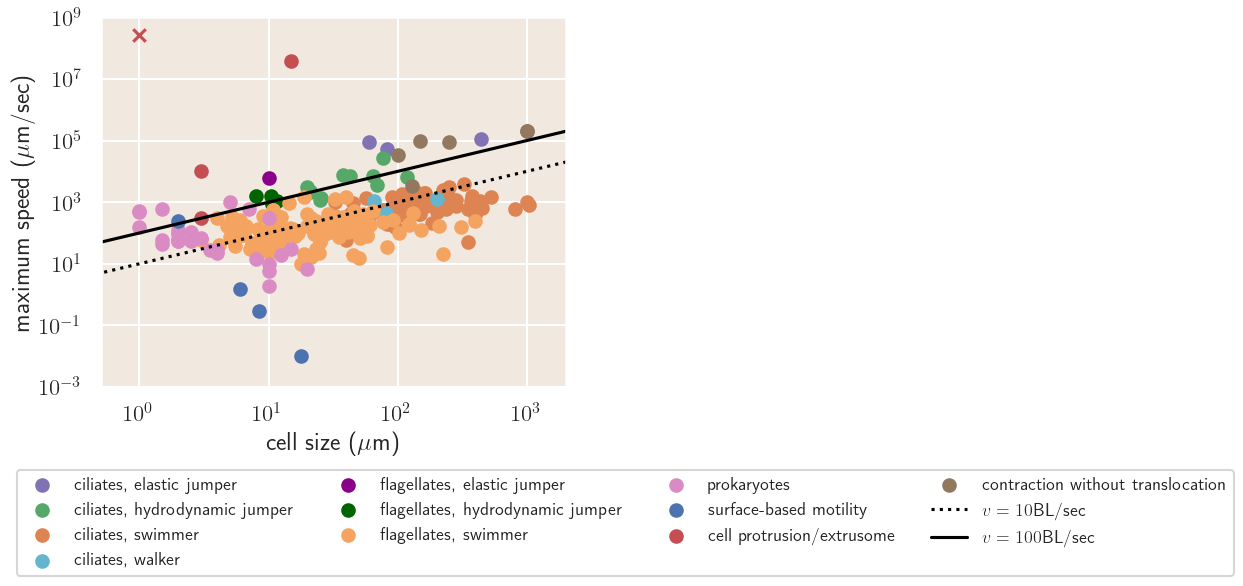

In [69]:
sns.set_style("darkgrid")
sns.set(rc = {'axes.facecolor': (241/255, 233/255, 224/255), 'figure.facecolor': 'white'})
sns.set_context("talk")
plt.figure(figsize = (6,4.8))
plt.scatter(Chang2024[Chang2024["Label"] == 'ciliates, elastic jumper']['L[μm]'], 
            Chang2024[Chang2024["Label"] == 'ciliates, elastic jumper']['U[μm/s]'], label = 'ciliates, elastic jumper', color = 'C4')
plt.scatter(Chang2024[Chang2024["Label"] == 'ciliates, hydrodynamic jumper']['L[μm]'], 
            Chang2024[Chang2024["Label"] == 'ciliates, hydrodynamic jumper']['U[μm/s]'], label = 'ciliates, hydrodynamic jumper', color = 'C2')
plt.scatter(Chang2024[Chang2024["Label"] == 'ciliates, swimmer']['L[μm]'], 
            Chang2024[Chang2024["Label"] == 'ciliates, swimmer']['U[μm/s]'], label = 'ciliates, swimmer', color = 'C1')
plt.scatter(Chang2024[Chang2024["Label"] == 'ciliates, walker']['L[μm]'], 
            Chang2024[Chang2024["Label"] == 'ciliates, walker']['U[μm/s]'], label = 'ciliates, walker', color = 'C9')
plt.scatter(Chang2024[Chang2024["Label"] == 'flagellates, elastic jumper']['L[μm]'], 
            Chang2024[Chang2024["Label"] == 'flagellates, elastic jumper']['U[μm/s]'], label = 'flagellates, elastic jumper', color = 'darkmagenta')
plt.scatter(Chang2024[Chang2024["Label"] == 'flagellates, hydrodynamic jumper']['L[μm]'], 
            Chang2024[Chang2024["Label"] == 'flagellates, hydrodynamic jumper']['U[μm/s]'], label = 'flagellates, hydrodynamic jumper', color = 'darkgreen')
plt.scatter(Chang2024[Chang2024["Label"] == 'flagellates, swimmers']['L[μm]'], 
            Chang2024[Chang2024["Label"] == 'flagellates, swimmers']['U[μm/s]'], label = 'flagellates, swimmer', color = 'sandybrown')
plt.scatter(Chang2024[Chang2024["Label"] == 'Prokaryotes']['L[μm]'], 
            Chang2024[Chang2024["Label"] == 'Prokaryotes']['U[μm/s]'], label = 'prokaryotes', color = 'C6')
plt.scatter([1.80E01, 8.40E0, 6.00E0, 2.00E0], [1.00E-02, 3.00E-01, 1.50E-00, 2.50E02], label = 'surface-based motility', color = 'C0')
plt.scatter([3.00E0, 1.50E1, 3.00E0], [1.00E4, 37.1E6, 3.00E2], label = 'cell protrusion/extrusome', color = 'C3')
plt.scatter([1.00E3, 2.50E2, 1.00E3, 1.00E2, 1.50E2, 1.30E2], [0.2E6, 8.80E4, 0.2E6, 3.30E4, 1.00E5, 3.30E3], 
            label = 'contraction without translocation', color = 'C5')
plt.scatter([1.00E0], [260E6], color = 'C3', marker = 'x')
plt.plot([0.3, 3E3], [3, 3E4], color = 'black', linestyle = 'dotted', label = r'$v=10$BL/sec')
plt.plot([0.3, 3E3], [30, 3E5], color = 'black', label = r'$v=100$BL/sec')
legend = plt.legend(fontsize = 13, bbox_to_anchor=(-0.2, -0.2), loc='upper left', ncols = 4)
frame = legend.get_frame()
frame.set_facecolor('white')
plt.xlabel(r'cell size ($\mu$m)')
plt.ylabel(r'maximum speed ($\mu$m/sec)')
plt.xlim([0.5, 2E3])
plt.ylim([1E-3, 1E9])
plt.xscale('log')
plt.yscale('log')
plt.savefig(output_path+'Fig_2C_v4.png', bbox_inches='tight', dpi = 400)

### Figure S3A + S3B

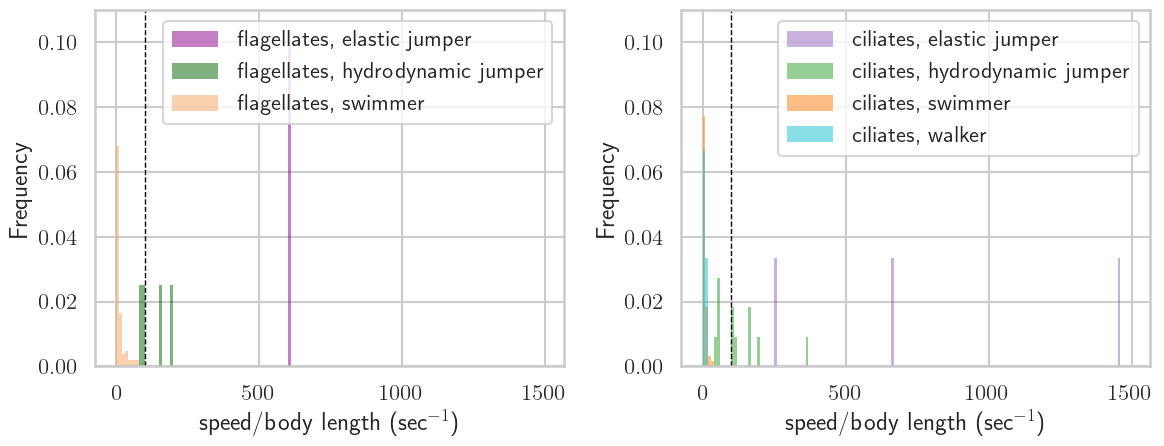

In [18]:
sns.set_context("talk")
plt.figure(figsize = (12,4.8))
plt.subplot(1,2,1)
plt.hist(Chang2024[Chang2024["Label"] == 'flagellates, elastic jumper']['speed/BL'], alpha=0.5, bins=np.arange(0,1500,10), 
         density=True, color = 'darkmagenta', label = 'flagellates, elastic jumper', lw = 0)
plt.hist(Chang2024[Chang2024["Label"] == 'flagellates, hydrodynamic jumper']['speed/BL'], alpha=0.5, bins=np.arange(0,1500,10), 
         density=True, color = 'darkgreen', label = 'flagellates, hydrodynamic jumper', lw = 0)
plt.hist(Chang2024[Chang2024["Label"] == 'flagellates, swimmers']['speed/BL'], alpha=0.5, bins=np.arange(0,1500,10), 
         density=True, color = 'sandybrown', label = 'flagellates, swimmer', lw = 0)
plt.legend()
plt.vlines(100,0,0.11, color = 'black', linestyle = 'dashed', lw = 1)
plt.xlabel(r'speed/body length (sec$^{-1}$)')
plt.ylim([0,0.11])
plt.ylabel('Frequency')
plt.subplot(1,2,2)
plt.hist(Chang2024[Chang2024["Label"] == 'ciliates, elastic jumper']['speed/BL'], alpha=0.5, bins=np.arange(0,1500,10), density=True, 
         color = 'C4', label = 'ciliates, elastic jumper', lw = 0)
plt.hist(Chang2024[Chang2024["Label"] == 'ciliates, hydrodynamic jumper']['speed/BL'], alpha=0.5, bins=np.arange(0,1500,10), density=True, 
         color = 'C2', label = 'ciliates, hydrodynamic jumper', lw = 0)
plt.hist(Chang2024[Chang2024["Label"] == 'ciliates, swimmer']['speed/BL'], alpha=0.5, bins=np.arange(0,1500,10), density=True, 
         color = 'C1', label = 'ciliates, swimmer', lw = 0)
plt.hist(Chang2024[Chang2024["Label"] == 'ciliates, walker']['speed/BL'], alpha=0.5, bins=np.arange(0,1500,10), density=True, 
         color = 'C9', label = 'ciliates, walker', lw = 0)
plt.legend()
plt.xlabel(r'speed/body length (sec$^{-1}$)')
plt.vlines(100,0,0.11, color = 'black', linestyle = 'dashed', lw = 1)
plt.ylim([0,0.11])
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig(output_path+'Fig_S3AB.png', bbox_inches='tight', dpi = 300)

### Figure S3C

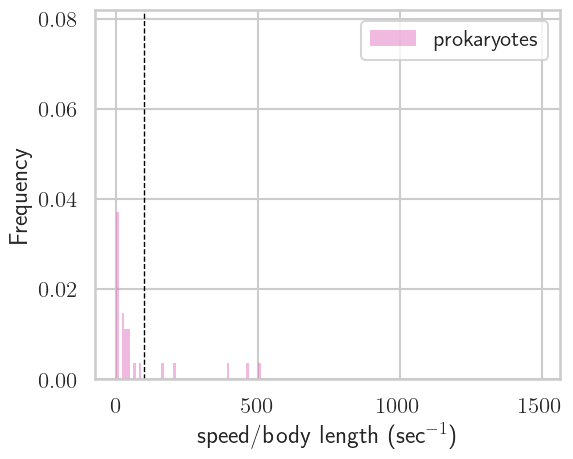

In [19]:
sns.set_context("talk")
plt.figure(figsize = (6,4.8))
plt.hist(Chang2024[Chang2024["Label"] == 'Prokaryotes']['speed/BL'], alpha=0.5, bins=np.arange(0,1500,10), density=True, color = 'C6', label = 'prokaryotes', lw = 0)
plt.legend()
plt.vlines(100,0,0.082, color = 'black', linestyle = 'dashed', lw = 1)
plt.xlabel(r'speed/body length (sec$^{-1}$)')
plt.ylim([0,0.082])
plt.ylabel('Frequency')
plt.savefig(output_path+'Fig_S3C.png', bbox_inches='tight', dpi = 300)

### Figure S3D

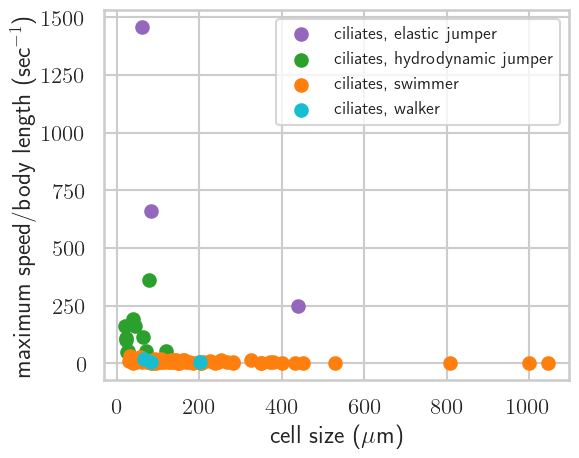

In [20]:
sns.set_context("talk")
plt.figure(figsize = (6,4.8))
plt.scatter(Chang2024[Chang2024["Label"] == 'ciliates, elastic jumper']['L[μm]'], 
            Chang2024[Chang2024["Label"] == 'ciliates, elastic jumper']['speed/BL'], label = 'ciliates, elastic jumper', color = 'C4')
plt.scatter(Chang2024[Chang2024["Label"] == 'ciliates, hydrodynamic jumper']['L[μm]'], 
            Chang2024[Chang2024["Label"] == 'ciliates, hydrodynamic jumper']['speed/BL'], label = 'ciliates, hydrodynamic jumper', color = 'C2')
plt.scatter(Chang2024[Chang2024["Label"] == 'ciliates, swimmer']['L[μm]'], 
            Chang2024[Chang2024["Label"] == 'ciliates, swimmer']['speed/BL'], label = 'ciliates, swimmer', color = 'C1')
plt.scatter(Chang2024[Chang2024["Label"] == 'ciliates, walker']['L[μm]'], 
            Chang2024[Chang2024["Label"] == 'ciliates, walker']['speed/BL'], label = 'ciliates, walker', color = 'C9')
plt.legend(fontsize = 13)
plt.xlabel(r'cell size ($\mu$m)')
plt.ylabel(r'maximum speed/body length (sec$^{-1}$)')
plt.savefig(output_path+'Fig_S3D.png', bbox_inches='tight', dpi = 300)

## Figure 2D

#### See "Chang_and_Prakash_2024.xlsx" sheet "Acceleration - line plot" for the data

	a = popt[0] = 0.9452604255309043
	b = popt[1] = 1.650395975283982
r^2 = 0.9522800052245012
5.2090420707674046


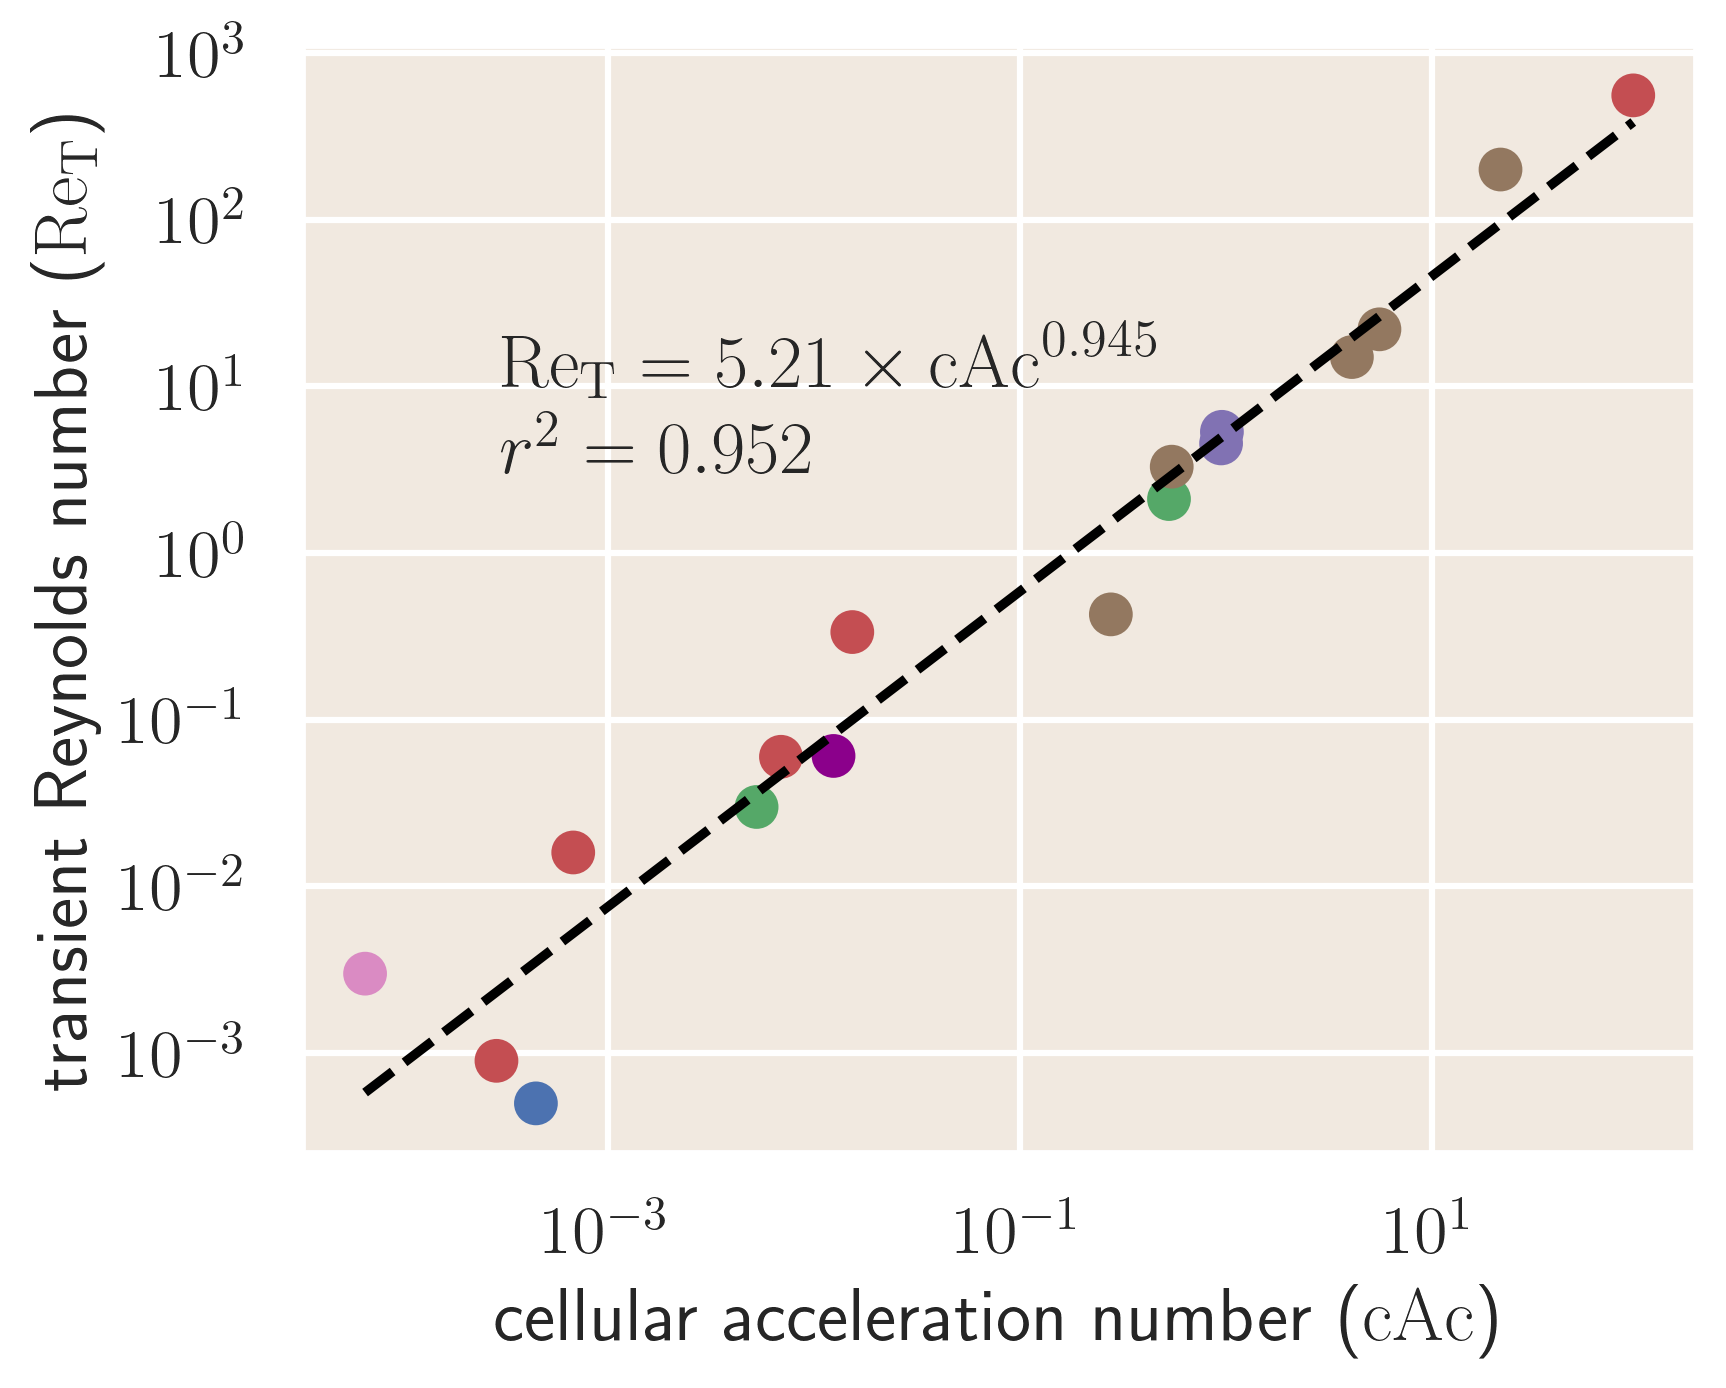

In [13]:
sns.set_style("darkgrid")
sns.set(rc = {'axes.facecolor': (241/255, 233/255, 224/255), 'figure.facecolor': 'white'})
sns.set_context("talk")

organisms = ['$\it{Spirostomum}$'+'\n'+'$\it{ambiguum}$', #1
             '$\it{Vorticella}$'+'\n'+'$\it{convallaria}$',#2
             'eMMP', #3
             'hydra\n nematocyst',#4
             '$\it{Halteria}$'+'\n'+'$\it{grandinella}$',#5
             '$\it{Nitzschia}$'+ '\n and $\it{Navicula}$',#6
             '$\it{Anncaliia}$'+'\n'+'$\it{algerae}$',#7
             '$\it{Pseudotontonia}$ sp.',#8
             '$\it{Strobilidium}$ sp.',#9
             '$\it{Tontonia}$ sp.',#10
             '$\it{Erythropsidinium}$\n protrusion',#11
             '$\it{Lacrymaria}$'+'\n'+'$\it{olor}$',#12
             '$\it{Actinocoryne}$'+'\n'+'$\it{contractilis}$',#13
            '$\it{Favella}$ sp.',#14
              '$\it{Storeatula}$'+'\n'+'ejectisomes',#15
             '$\it{Rhodomonas}$ ejectisome'+'\n'+'cell body jump',#16
             '$\it{Chrysochromulina}$'+'\n'+'cell body jump',#17
            ]
Re_T = [2.00E+02, 2.20E+01, 3.00E-03, 5.57E+02, 3.00E-02,
        5.00E-04, 9.00E-04, 4.55E+00, 2.11E+00, 5.34E+00,
        3.30E+00, 6.00E-02, 1.50E+01, 4.29E-01, 1.60E-02, 
        3.36E-01, 6.07E-02]
cAcc = [21.51657415, 5.555555556, 0.0000657717715, 94.95613022, 0.005243691095, 
        0.0004444444444, 0.0002858531091, 0.9454221733, 0.5280127102, 0.954227199, 
        0.544331054, 0.006885303727, 4.082482905, 0.275582436, 0.0006746192342, 
       0.01529095593, 0.01239673394]
c = np.array([5, 5, 6, 3, 2, 
              0, 3, 4, 2, 4, 
              5, 3, 5, 5, 3, 
              3, 7])
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'darkmagenta']

def myFunc(x, a, b):
    return a*x+b
popt, pcov = curve_fit(myFunc, np.log(np.array(cAcc)), np.log(np.array(Re_T)))
print("\ta = popt[0] = {0}\n\tb = popt[1] = {1}".format(*popt))
residuals = np.log(Re_T) - myFunc(np.log(cAcc), *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((np.log(Re_T)-np.mean(np.log(Re_T)))**2)
r_squared = 1 - (ss_res / ss_tot)
print("r^2 = {0}".format(r_squared))
print(np.exp(1.650395975283982))

sns.set_context("talk")
fig, ax = plt.subplots(dpi = 300, figsize = (6, 4.8))
cmap, norm = matplotlib.colors.from_levels_and_colors(np.arange(0, c.max()+2), colors)
scatter = ax.scatter(cAcc, Re_T, c=c, cmap=cmap, norm=norm)
newX = np.linspace(np.min(cAcc), np.max(cAcc), 100)
plt.plot(newX, np.exp(myFunc(np.log(newX), *popt)), 'black', 
         label="({0:.3f}*x**{1:.3f})".format(*popt), linestyle = 'dashed')

plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'transient Reynolds number ($\mathrm{Re}_{\mathrm{T}}$)')
plt.xlabel(r'cellular acceleration number ($\mathrm{cAc}$)')
plt.text(3E-4, 1E1, r"$\mathrm{Re}_{\mathrm{T}}= 5.21\times\mathrm{cAc}^{0.945}$")
plt.text(3E-4, 3E0, r"$r^2 = 0.952$")
plt.savefig(output_path+'Fig_2D_v3.png', bbox_inches='tight', dpi = 400)

## Figure 5A

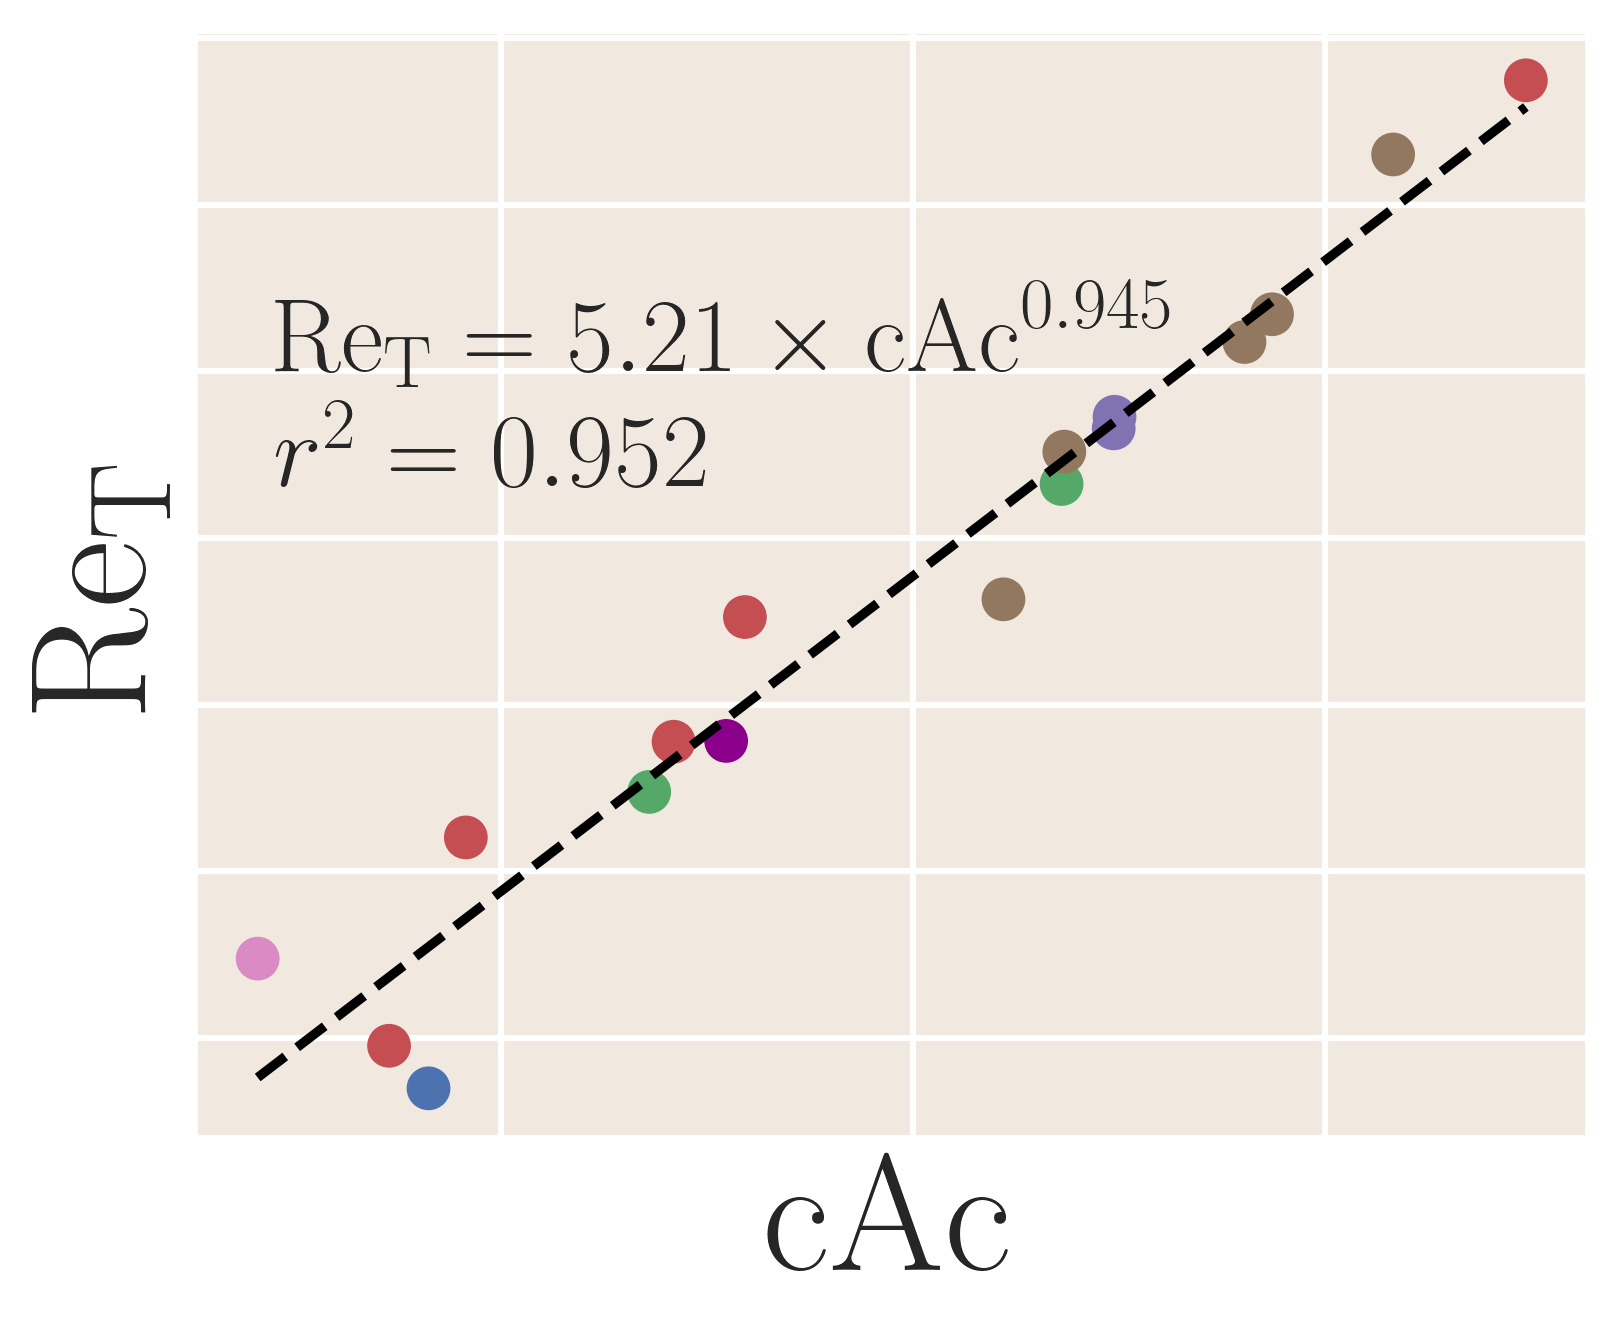

In [14]:
sns.set_context("talk")
fig, ax = plt.subplots(dpi = 300, figsize = (6, 4.8))
cmap, norm = matplotlib.colors.from_levels_and_colors(np.arange(0, c.max()+2), colors)
scatter = ax.scatter(cAcc, Re_T, c=c, cmap=cmap, norm=norm)
newX = np.linspace(np.min(cAcc), np.max(cAcc), 100)
plt.plot(newX, np.exp(myFunc(np.log(newX), *popt)), 'black', 
         label="({0:.3f}*x**{1:.3f})".format(*popt), linestyle = 'dashed')
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$\mathrm{Re}_{\mathrm{T}}$', fontsize = 40)
plt.xlabel(r'$\mathrm{cAc}$', fontsize = 40)
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,
    left = False,
    right = False,# ticks along the top edge are off
    labelbottom=False, labelleft = False) # labels along the bottom edge are off
plt.text(0.8E-4, 1E1, r"$\mathrm{Re}_{\mathrm{T}}= 5.21\times\mathrm{cAc}^{0.945}$", fontsize = 25)
plt.text(0.8E-4, 2E0, r"$r^2 = 0.952$", fontsize = 25)
plt.savefig(output_path+'Fig_2D_simplified.png', bbox_inches='tight', dpi = 400)

## Figure 3A

#### See "Chang_and_Prakash_2024.xlsx" sheet "area strain rate" for the data

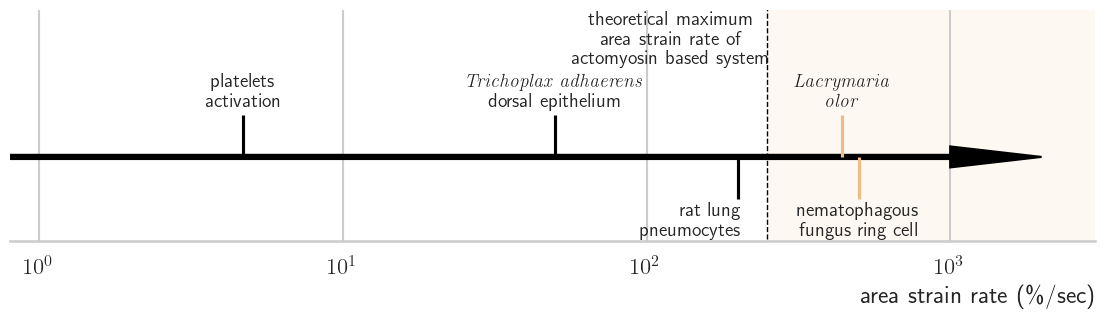

In [95]:
organisms = ['$\it{Lacrymaria}$'+'\n'+'$\it{olor}$', 
             '$\it{Trichoplax}$'+' '+'$\it{adhaerens}$'+'\n'+'dorsal epithelium',
             'rat lung\npneumocytes', 
             'platelets\nactivation',
             'nematophagous'+'\n'+'fungus ring cell'
            ]
area_strain_rate = [440, 50, 200, 4.7, 500]

sns.set_style('whitegrid')
sns.set_context("talk")
plt.figure(figsize=(14,3))
plt.arrow(3E-1, 0, 1E3, 0, color = 'black', width = .1, head_width = .5, head_length = 1E3)
plt.xscale('log')
plt.xticks(ticks=[1E0, 1E1, 1E2, 1E3])
ax = plt.gca()
ax.yaxis.set_visible(False)
ax.spines[["left", "top", "right"]].set_visible(False)

levels = [1,#lacry
          1, #tplax
          -1, #lung
          1, #platelet
          -1, # fungus
         ]
alignment = [0,#lacry
            0, #tplax
            1, #lung
            0,#platelet
             0, #fungus
            ]
colors = [(241/255, 187/255, 135/255),#lacry
          'black', #tplax
            'black', #lung
            'black',#platelet
          (241/255, 187/255, 135/255), #fungus
         ]

ax.vlines(area_strain_rate, 0, levels, color=colors)
for d, l, r, a in zip(area_strain_rate, levels, organisms, alignment):
    ax.annotate(r, xy=(d, l),
                xytext=(3*np.sign(a), np.sign(l)*3), textcoords="offset points",
                horizontalalignment="center" if a == 0 else "left" if a == -1 else "right",
                verticalalignment="bottom" if l > 0 else "top", 
                fontsize = 14)
plt.text(120, 2.2, 'theoretical maximum \n area strain rate of \n actomyosin based system', 
         fontsize = 14, ha = 'center')
ax.vlines(250,-5,5, color = 'black', linewidth = 1, linestyle = 'dashed')
plt.fill_between([250, 3E3], [5,5], [-5,-5], color = (241/255, 187/255, 135/255), alpha = 0.1, lw=0, zorder = 0)
plt.xlabel('area strain rate (\%/sec)', loc = 'right')
plt.ylim([-2,3.5])
plt.xlim([8E-1, 3E3])
plt.savefig(output_path+'Fig_3A_v2.png', bbox_inches='tight', dpi = 400)

## Figure 3B

#### See "Chang_and_Prakash_2024.xlsx" sheet "volume expansion strain rate" for the data

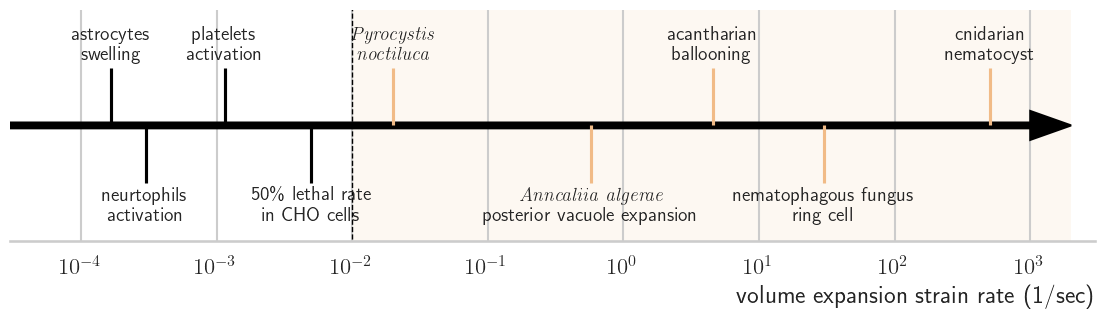

In [94]:
organisms = ['$\it{Pyrocystis}$'+'\n'+'$\it{noctiluca}$', 
             'astrocytes\nswelling',
             'neurtophils\nactivation', 
             'platelets\nactivation',
             '50\% lethal rate\nin CHO cells',
             'acantharian\nballooning',
             'cnidarian\nnematocyst',
             '$\it{Anncaliia}$'+' '+'$\it{algerae}$'+'\n'+'posterior vacuole expansion',
             'nematophagous fungus'+'\n'+'ring cell'
            ]
vol_exp_strain_rate = [0.02, 1.67E-4, 3E-4, 1.15E-3, 5E-3, 4.54, 506, 0.58, 30]

sns.set_context("talk")
plt.figure(figsize=(14,3))
plt.arrow(3E-5, 0, 1E3, 0, color = 'black', width = .1, head_width = .5, head_length = 1E3)
plt.xscale('log')
plt.xticks(ticks=[1E-4, 1E-3, 1E-2, 1E-1, 1E0, 1E1, 1E2, 1E3])
ax = plt.gca()
ax.yaxis.set_visible(False)
ax.spines[["left", "top", "right"]].set_visible(False)

levels = [1,#pyro 
          1, #astrocyte
          -1, #neutrophil
          1, #platelet
          -1, #lethal
          1, #acantharian 
          1, #nematocyst
          -1, #microsporidia
          -1, #fungus
         ]
alignment = [0,#pyro
            0, #astrocyte
            0, #neutrophil
            0,#platelet
            0,#lethal
             0, #acantharian
             0, #nematocyst
             0, #microsporidia
             0, #fungus
            ]
colors = [(241/255, 187/255, 135/255),#pyro
          'black', #astrocyte
            'black', #neutrophil
            'black',#platelet
            'black',#lethal
          (241/255, 187/255, 135/255), #acantharian
          (241/255, 187/255, 135/255), #nematocyst
          (241/255, 187/255, 135/255), #microsporidia
          (241/255, 187/255, 135/255), #fungus
         ]

ax.vlines(vol_exp_strain_rate, 0, levels, color=colors)
for d, l, r, a in zip(vol_exp_strain_rate, levels, organisms, alignment):
    ax.annotate(r, xy=(d, l),
                xytext=(3*np.sign(a), np.sign(l)*3), textcoords="offset points",
                horizontalalignment="center" if a == 0 else "left" if a == -1 else "right",
                verticalalignment="bottom" if l > 0 else "top", 
                fontsize = 14)

ax.vlines(1E-2,-5,5, color = 'black', linewidth = 1, linestyle = 'dashed')
plt.fill_between([1E-2, 2E3], [5,5], [-5,-5], color = (241/255, 187/255, 135/255), alpha = 0.1, lw=0, zorder = 0)
plt.xlabel('volume expansion strain rate (1/sec)', loc = 'right')
plt.ylim([-2,2])
plt.xlim([3E-5,3E3])
plt.savefig(output_path+'Fig_3B_v2.png', bbox_inches='tight', dpi = 400)

## Figure 3C

#### See "Chang_and_Prakash_2024.xlsx" sheet "density change rate" for the data

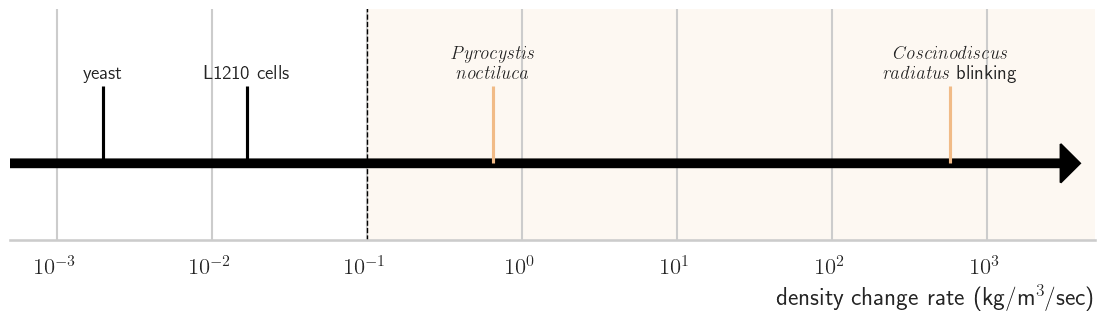

In [93]:
organisms = ['$\it{Coscinodiscus}$'+'\n'+'$\it{radiatus}$'+' blinking',
             '$\it{Pyrocystis}$'+'\n'+'$\it{noctiluca}$', 
             'yeast',
             'L1210 cells'
            ]
density_rate = [5.84E+02, 0.65, 0.002, 0.017]

sns.set_context("talk")
plt.figure(figsize=(14,3))
plt.arrow(3E-4, 0, 3E3, 0, color = 'black', width = .1, head_width = .5, head_length = 1E3)
plt.xscale('log')
plt.xticks(ticks=[1E-3, 1E-2, 1E-1, 1E0, 1E1, 1E2, 1E3])
ax = plt.gca()
ax.yaxis.set_visible(False)
ax.spines[["left", "top", "right"]].set_visible(False)

levels = [1,#diatom
          1, #pyro
          1, #yeast
          1, #L1210
         ]
alignment = [0,#diatom
            0, #pyro
            0, #yeast
            0,#L1210
            ]
colors = [ (241/255, 187/255, 135/255),#diatom
           (241/255, 187/255, 135/255), #pyro
          'black', #yeast
          'black', #L1210
         ]

ax.vlines(density_rate, 0, levels, color=colors)
for d, l, r, a in zip(density_rate, levels, organisms, alignment):
    ax.annotate(r, xy=(d, l),
                xytext=(3*np.sign(a), np.sign(l)*3), textcoords="offset points",
                horizontalalignment="center" if a == 0 else "left" if a == -1 else "right",
                verticalalignment="bottom" if l > 0 else "top", 
                fontsize = 14)
ax.vlines(1E-1,-5,5, color = 'black', linewidth = 1, linestyle = 'dashed')
plt.fill_between([1E-1, 5E3], [5,5], [-5,-5], color = (241/255, 187/255, 135/255), alpha = 0.1, lw=0, zorder = 0)
plt.xlabel(r'density change rate (kg/m$^3$/sec)', loc = 'right')
plt.ylim([-1,2])
plt.xlim([5E-4,5E3])
plt.savefig(output_path+'Fig_3C_v2.png', bbox_inches='tight', dpi = 400)

## Figure 6A

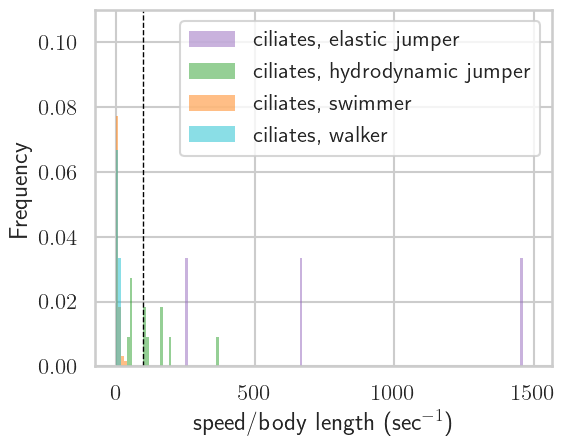

In [17]:
sns.set_context("talk")
plt.figure(figsize = (6,4.8))
plt.hist(Chang2024[Chang2024["Label"] == 'ciliates, elastic jumper']['speed/BL'], alpha=0.5, bins=np.arange(0,1500,10), density=True, 
         color = 'C4', label = 'ciliates, elastic jumper', lw = 0)
plt.hist(Chang2024[Chang2024["Label"] == 'ciliates, hydrodynamic jumper']['speed/BL'], alpha=0.5, bins=np.arange(0,1500,10), density=True, 
         color = 'C2', label = 'ciliates, hydrodynamic jumper', lw = 0)
plt.hist(Chang2024[Chang2024["Label"] == 'ciliates, swimmer']['speed/BL'], alpha=0.5, bins=np.arange(0,1500,10), density=True, 
         color = 'C1', label = 'ciliates, swimmer', lw = 0)
plt.hist(Chang2024[Chang2024["Label"] == 'ciliates, walker']['speed/BL'], alpha=0.5, bins=np.arange(0,1500,10), density=True, 
         color = 'C9', label = 'ciliates, walker', lw = 0)
plt.legend()
plt.xlabel(r'speed/body length (sec$^{-1}$)')
plt.vlines(100,0,0.11, color = 'black', linestyle = 'dashed', lw = 1)
plt.ylim([0,0.11])
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig(output_path+'Fig_5A.png', bbox_inches='tight', dpi = 300)

## Figure 6B

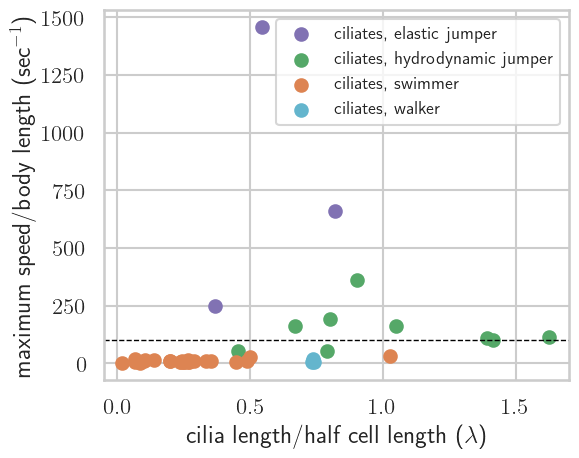

In [96]:
sns.set_context("talk")
plt.figure(figsize = (6,4.8))
plt.scatter(Chang2024[Chang2024["Label"] == 'ciliates, elastic jumper']['cilia length/(length/2)'], 
            Chang2024[Chang2024["Label"] == 'ciliates, elastic jumper']['speed/BL'], label = 'ciliates, elastic jumper', color = 'C4')
plt.scatter(Chang2024[Chang2024["Label"] == 'ciliates, hydrodynamic jumper']['cilia length/(length/2)'], 
            Chang2024[Chang2024["Label"] == 'ciliates, hydrodynamic jumper']['speed/BL'], label = 'ciliates, hydrodynamic jumper', color = 'C2')
plt.scatter(Chang2024[Chang2024["Label"] == 'ciliates, swimmer']['cilia length/(length/2)'], 
            Chang2024[Chang2024["Label"] == 'ciliates, swimmer']['speed/BL'], label = 'ciliates, swimmer', color = 'C1')
plt.scatter(Chang2024[Chang2024["Label"] == 'ciliates, walker']['cilia length/(length/2)'], 
            Chang2024[Chang2024["Label"] == 'ciliates, walker']['speed/BL'], label = 'ciliates, walker', color = 'C9')
plt.legend(fontsize = 13)
plt.xlabel(r'cilia length/half cell length ($\lambda$)')
plt.ylabel(r'maximum speed/body length (sec$^{-1}$)')
plt.hlines(100,-0.05,1.7, color = 'black', linestyle = 'dashed', lw = 1)
plt.xlim([-0.05,1.7])
plt.savefig(output_path+'Fig_5B.png', bbox_inches='tight', dpi = 300)

## Fig. S4

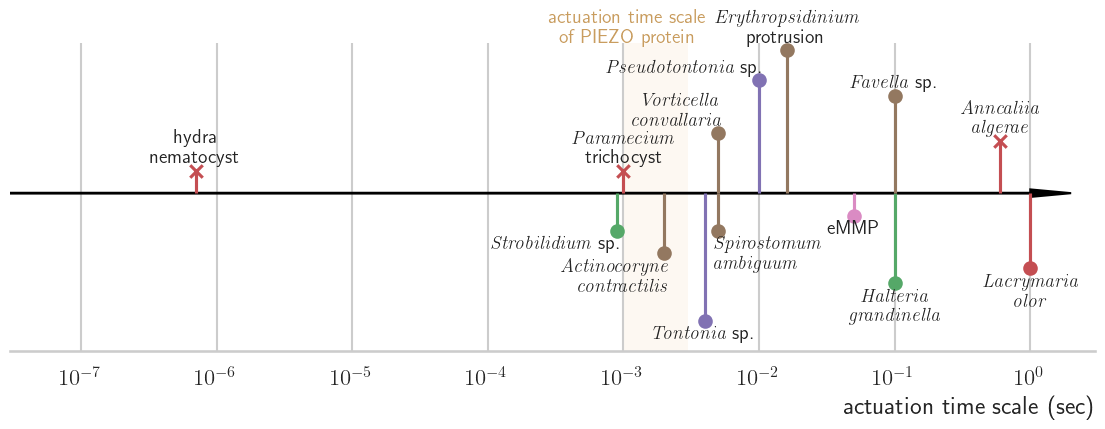

In [55]:
organisms = ['$\it{Spirostomum}$'+'\n'+'$\it{ambiguum}$', 
             '$\it{Vorticella}$'+'\n'+'$\it{convallaria}$',
             'eMMP', 
             'hydra\n nematocyst',
             '$\it{Halteria}$'+'\n'+'$\it{grandinella}$', #5
             '$\it{Anncaliia}$'+'\n'+'$\it{algerae}$',
             '$\it{Pseudotontonia}$ sp.',
             '$\it{Strobilidium}$ sp.',
             '$\it{Tontonia}$ sp.',
             '$\it{Erythropsidinium}$\n protrusion', #10
             '$\it{Lacrymaria}$'+'\n'+'$\it{olor}$',
             '$\it{Actinocoryne}$'+'\n'+'$\it{contractilis}$',
            '$\it{Favella}$ sp.',
             '$\it{Paramecium}$'+'\n'+'trichocyst',
             ''
            ]
time_scale = [5E-3, 5E-3, 5E-2, 700E-9, 0.1, 
              0.6, 1E-2, 8.9E-4, 4E-3, 1.6E-2, 
              1, 2E-3, 100E-3, 1E-3]

sns.set_context("talk")
plt.figure(figsize=(14,4))
plt.arrow(3E-8, 0, 1E0, 0, color = 'black', width = .1, head_width = 1, head_length = 1E0)
plt.xscale('log')
plt.xticks(ticks=[1E-7, 1E-6, 1E-5, 1E-4, 1E-3, 1E-2, 1E-1, 1E0])
ax = plt.gca()
ax.yaxis.set_visible(False)
ax.spines[["left", "top", "right"]].set_visible(False)

levels = [-5,#spiro 
          8, #vorticella
          -3, #eMMP
          3, #nematocyst
          -12, #Halteria
          7, #microsporidia
          15, #pseudotontonia
          -5, #strobilidium
          -17, #tontonia
          19, #Erythropsidinium
          -10, #lacry
          -8, #actinocoryne
          13, # Favella
          3, # trichocyst
         ]
alignment = [-1,#spiro
            1, #vorticella
            0, #eMMP
            0,#nematocyst
            0,#Halteria
            0,#microsporidia
             1,#pseudotontonia
             1,#strobilidium
             0,#tontonia
             0,#Erythropsidinium
             0,#lacry
             1, #actinocoryne
             0, #Favella
             0, #trichocyst
            ]
colors = ['C5',#spiro
          'C5', #vorticella
            'C6', #eMMP
            'C3',#nematocyst
            'C2',#Halteria
            'C3',#microsporidia
             'C4',#pseudotontonia
             'C2',#strobilidium
             'C4',#tontonia
             'C5',#Erythropsidinium
             'C3',#lacry
             'C5', #actinocoryne
          'C5', #Favella
          'C3',#trichocyst
         ]
markers = ['o',#spiro
          'o', #vorticella
            'o', #eMMP
            'x',#nematocyst
            'o',#Halteria
            'x',#microsporidia
             'o',#pseudotontonia
             'o',#strobilidium
             'o',#tontonia
             'o',#Erythropsidinium
             'o',#lacry
             'o', #actinocoryne
          'o', #Favella
          'x',#trichocyst
         ]

ax.vlines(time_scale, 0, levels, color=colors)

for t, l, c, m in zip(time_scale, levels, colors, markers):
    plt.scatter(t, l, color = c, marker = m)

for d, l, r, a in zip(time_scale, levels, organisms, alignment):
    ax.annotate(r, xy=(d, l),
                xytext=(3*np.sign(a), np.sign(l)*3), textcoords="offset points",
                horizontalalignment="center" if a == 0 else "left" if a == -1 else "right",
                verticalalignment="bottom" if l > 0 else "top", 
                fontsize = 14)

plt.xlabel('actuation time scale (sec)', loc = 'right')
plt.ylim([-21,20])
plt.xlim([3E-8,3E0])
plt.fill_between([1E-3, 3E-3], [20,20], [-21,-21], 
                 color = (241/255, 187/255, 135/255), alpha = 0.1, lw=0, zorder = 0)
ax.annotate('actuation time scale\n of PIEZO protein', xy = (1E-3, 19), 
            xytext=(3*np.sign(1), np.sign(19)*3), textcoords="offset points", 
           horizontalalignment="center" ,
                verticalalignment="bottom", 
                fontsize = 14, color = (201/255, 157/255, 95/255))
plt.savefig(output_path+'Fig_S4.png', bbox_inches='tight', dpi = 400)

## Cilia length statistics

In [21]:
print('hydrodynamic jumper')
print('cilia length mean (um)')
print(np.nanmean(Chang2024[Chang2024["Label"] == 'ciliates, hydrodynamic jumper']['cilia length [um]']))
print('cilia length std (um)')
print(np.nanstd(Chang2024[Chang2024["Label"] == 'ciliates, hydrodynamic jumper']['cilia length [um]']))
print('n')
print(np.sum(Chang2024[Chang2024["Label"] == 'ciliates, hydrodynamic jumper']['cilia length [um]'] > 0))
print('usual swimmer')
print('cilia length mean (um)')
print(np.nanmean(Chang2024[Chang2024["Label"] == 'ciliates, swimmer']['cilia length [um]']))
print('cilia length std (um)')
print(np.nanstd(Chang2024[Chang2024["Label"] == 'ciliates, swimmer']['cilia length [um]']))
print('n')
print(np.sum(Chang2024[Chang2024["Label"] == 'ciliates, swimmer']['cilia length [um]'] > 0))

hydrodynamic jumper
cilia length mean (um)
18.833333333333332
cilia length std (um)
11.105554165971787
n
9
usual swimmer
cilia length mean (um)
12.69375
cilia length std (um)
6.909750244220119
n
24


In [22]:
cilia_L_jumper = Chang2024[Chang2024["Label"] == 'ciliates, hydrodynamic jumper']['cilia length [um]'].to_numpy()
cilia_L_jumper = cilia_L_jumper[cilia_L_jumper>0]
cilia_L_swimmer = Chang2024[Chang2024["Label"] == 'ciliates, swimmer']['cilia length [um]'].to_numpy()
cilia_L_swimmer = cilia_L_swimmer[cilia_L_swimmer>0]

ttest_ind(cilia_L_jumper, cilia_L_swimmer, alternative = 'greater')

TtestResult(statistic=1.8413335498144345, pvalue=0.03757999497344673, df=31.0)

In [23]:
print('hydrodynamic jumper')
print('cilia length ratio')
print(np.nanmean(Chang2024[Chang2024["Label"] == 'ciliates, hydrodynamic jumper']['cilia length/(length/2)']))
print('cilia length ratio std')
print(np.nanstd(Chang2024[Chang2024["Label"] == 'ciliates, hydrodynamic jumper']['cilia length/(length/2)']))
print('n')
print(np.sum(Chang2024[Chang2024["Label"] == 'ciliates, hydrodynamic jumper']['cilia length/(length/2)'] > 0))
print('usual swimmer')
print('cilia length ratio')
print(np.nanmean(Chang2024[Chang2024["Label"] == 'ciliates, swimmer']['cilia length/(length/2)']))
print('cilia length ratio std')
print(np.nanstd(Chang2024[Chang2024["Label"] == 'ciliates, swimmer']['cilia length/(length/2)']))
print('n')
print(np.sum(Chang2024[Chang2024["Label"] == 'ciliates, swimmer']['cilia length/(length/2)'] > 0))

hydrodynamic jumper
cilia length ratio
1.0093029496444446
cilia length ratio std
0.3682248014727178
n
9
usual swimmer
cilia length ratio
0.26719464742916665
cilia length ratio std
0.20227530373963498
n
24


In [24]:
cilia_ratio_jumper = Chang2024[Chang2024["Label"] == 'ciliates, hydrodynamic jumper']['cilia length/(length/2)'].to_numpy()
cilia_ratio_jumper = cilia_ratio_jumper[cilia_ratio_jumper>0]
cilia_ratio_swimmer = Chang2024[Chang2024["Label"] == 'ciliates, swimmer']['cilia length/(length/2)'].to_numpy()
cilia_ratio_swimmer = cilia_ratio_swimmer[cilia_ratio_swimmer>0]

ttest_ind(cilia_ratio_jumper, cilia_ratio_swimmer, alternative = 'greater')

TtestResult(statistic=7.123320660297953, pvalue=2.6349822679102816e-08, df=31.0)

In [25]:
geom_fac = lambda x: (4*x**2 + 9*x + 6)/(1+x)
print(geom_fac(1.4))
print(geom_fac(1.0))
print(geom_fac(0.27))

11.016666666666666
9.5
6.86740157480315


In [26]:
print(np.nanmean(Chang2024[Chang2024["Label"] == 'ciliates, hydrodynamic jumper']['speed/BL']))
print(np.nanstd(Chang2024[Chang2024["Label"] == 'ciliates, hydrodynamic jumper']['speed/BL']))
print(np.sum(Chang2024[Chang2024["Label"] == 'ciliates, hydrodynamic jumper']['speed/BL'] > 0))

128.1036113845569
88.01053637923896
11


In [27]:
print(np.nanmean(Chang2024[Chang2024["Label"] == 'ciliates, swimmer']['speed/BL']))
print(np.nanstd(Chang2024[Chang2024["Label"] == 'ciliates, swimmer']['speed/BL']))
print(np.sum(Chang2024[Chang2024["Label"] == 'ciliates, swimmer']['speed/BL'] > 0))

6.760864234822926
5.790700183777639
66
